Подключение библиотек

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_excel('/content/drive/MyDrive/raifhack/Data/empty.xlsx')
df.head()

,Unnamed: 0,id,region,city,street,floor,realty_type,date,lng,lat,per_square_meter_price,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_city_nearest_name,osm_city_nearest_population,osm_city_closest_dist,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_transport_stop_closest_dist,osm_crossing_closest_dist,reform_count_of_houses_1000,reform_count_of_houses_500,reform_mean_floor_count_500,reform_mean_floor_count_1000,reform_mean_year_building_500,reform_mean_year_building_1000,reform_house_population_500,reform_house_population_1000,price_type
0,0,0,Tatarstan,K,1,7,2,01.05.2021,55.821856,50.821856,123.8700,2,1,2,2,2,6,6,5,6,3,2,7,4,7,7,2,1,7,3,6,5,7,7,1,3,3,1,8,3,1,3,6,7,3,5,1,2,3,4,5,7,6,2,6,7,3,5,1,2,3,Tatarstan,5,7,6,6,7,3,5,1,2,3,4,5,7,6,0
1,1,1,Bryansk region,S,4,5,4,09.05.2021,58.821856,54.821856,45.7700,3,2,7,4,7,1,2,1,7,6,5,7,7,1,6,3,1,8,7,4,6,5,1,3,7,6,5,8,6,1,8,7,3,1,7,4,5,4,6,6,7,3,3,7,3,1,7,4,5,4,Bryansk region,6,7,3,7,3,1,7,4,5,4,6,6,7,3,1
2,2,2,Kaluga region,D,2,8,3,01.06.2021,58.821856,58.821856,34.6570,6,5,7,7,1,3,3,1,8,4,6,5,1,3,4,6,5,8,6,4,3,4,2,2,5,3,8,6,2,5,6,8,7,3,1,3,4,3,2,4,4,2,5,8,7,3,1,3,4,3,Kaluga region,4,4,2,8,7,3,1,3,4,3,2,4,4,2,1
3,3,3,Ryazan region,G,3,4,2,15.11.2021,54.821856,53.821856,122.6500,4,6,5,1,3,7,6,5,8,4,3,4,2,2,3,3,8,6,4,1,2,2,2,6,6,5,6,7,5,1,2,8,6,6,1,8,3,7,5,4,7,5,2,8,6,6,1,8,3,7,Ryazan region,4,7,5,8,6,6,1,8,3,7,5,4,7,5,1
4,4,4,Chuvash Republic,F,1,2,1,23.05.2020,67.821856,61.821856,54.5647,4,3,4,2,2,5,3,8,6,1,2,2,2,6,1,5,6,7,3,2,7,4,7,1,2,1,7,3,7,4,5,6,4,2,5,6,5,1,3,8,8,4,1,6,4,2,5,6,5,1,Chuvash Republic,8,8,4,6,4,2,5,6,5,1,3,8,8,4,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 77 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           5 non-null      int64  
 1   id                                   5 non-null      int64  
 2   region                               5 non-null      object 
 3   city                                 5 non-null      object 
 4   street                               5 non-null      int64  
 5   floor                                5 non-null      int64  
 6   realty_type                          5 non-null      int64  
 7   date                                 5 non-null      object 
 8   lng                                  5 non-null      float64
 9   lat                                  5 non-null      float64
 10  per_square_meter_price               5 non-null      float64
 11  osm_catering_points_in_0.001        

Данные, которые первоначально хочется оставить:

region  - one-hot-coding

floor 

realty_type - one-hot-coding

date - стоит вытащить отсюда месяц и день недели

lng - масштабировать

lat

per_square_meter_price

osm_catering_points_in_0.01  

osm_shops_points_in_0.01 

osm_offices_points_in_0.01

osm_finance_points_in_0.01

osm_healthcare_points_in_0.01

osm_leisure_points_in_0.01 

osm_historic_points_in_0.01

osm_building_points_in_0.01 

osm_hotels_points_in_0.01

osm_culture_points_in_0.01 

osm_amenity_points_in_0.01

osm_train_stop_points_in_0.01 

osm_transport_stop_points_in_0.01 

osm_crossing_points_in_0.01

osm_city_nearest_population  

osm_city_closest_dist

osm_subway_closest_dist

osm_train_stop_closest_dist 

osm_transport_stop_closest_dist  

osm_crossing_closest_dist

reform_count_of_houses_1000 

reform_mean_floor_count_1000

reform_mean_year_building_1000 

reform_house_population_1000

price_type 




## Просмотр данных

### Region

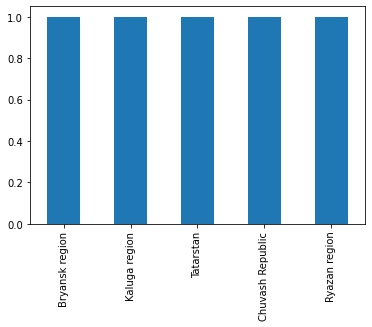

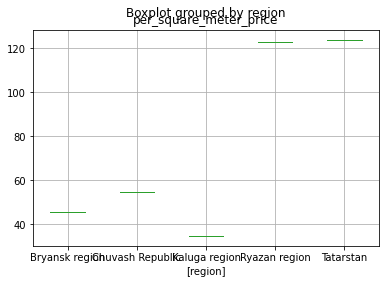

In [11]:
#распределение данных
df['region'].value_counts().plot(kind='bar')
#зависимость целевой переменной
df.boxplot(column=["per_square_meter_price"], by=['region'])

### floor

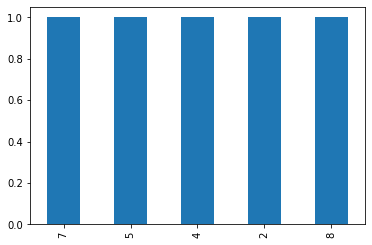

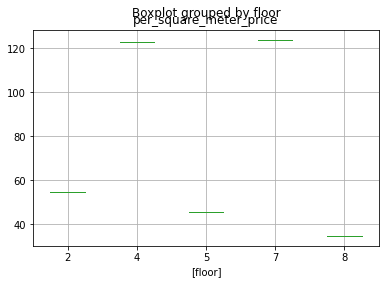

In [13]:
#распределение данных
df['floor'].value_counts().plot(kind='bar')
#зависимость целевой переменной
df.boxplot(column=['per_square_meter_price'], by=['floor'])

### realty_type

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


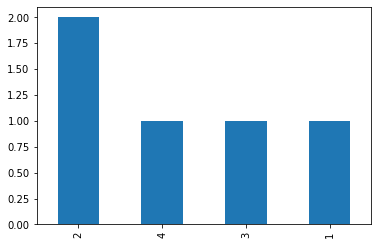

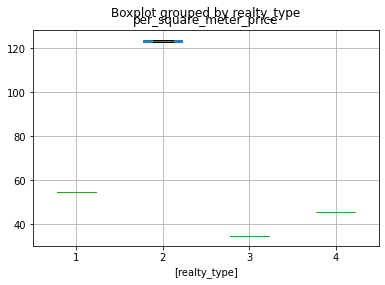

In [14]:
#распределение данных
df['realty_type'].value_counts().plot(kind='bar')
#зависимость целевой переменной
df.boxplot(column=['per_square_meter_price'], by=['realty_type'])

### price_type

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


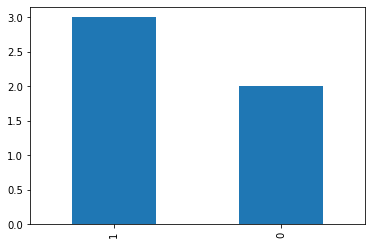

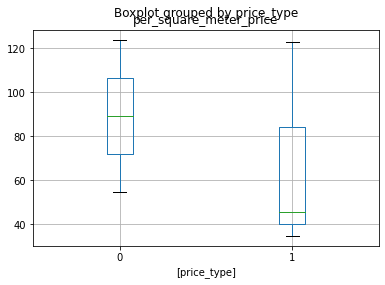

In [15]:
#распределение данных
df['price_type'].value_counts().plot(kind='bar')
#зависимость целевой переменной
df.boxplot(column=['per_square_meter_price'], by=['price_type'])

### date

In [25]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))

In [35]:
df['month'] = df['date'].apply(lambda x: x.month)

In [36]:
df['weekday'] = df['date'].apply(lambda x: x.day_name())

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


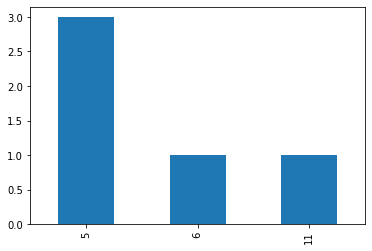

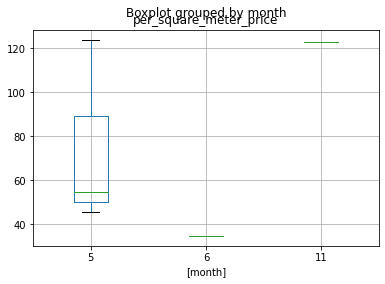

In [37]:
#распределение данных
df['month'].value_counts().plot(kind='bar')
#зависимость целевой переменной
df.boxplot(column=['per_square_meter_price'], by=['month'])

In [3]:
#распределение данных
df['weekday'].value_counts().plot(kind='bar')
#зависимость целевой переменной
df.boxplot(column=['per_square_meter_price'], by=['weekday'])

### lng, lat

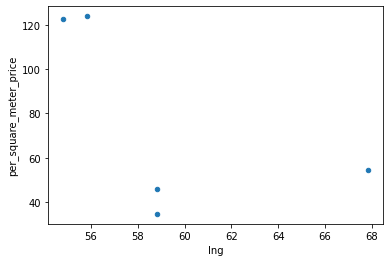

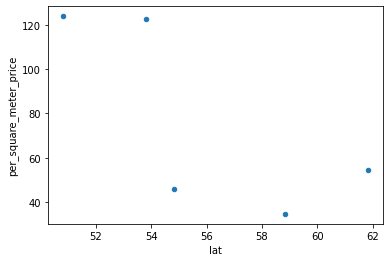

In [38]:
df.plot(kind = 'scatter', x = 'lng', y = 'per_square_meter_price')
df.plot(kind = 'scatter', x = 'lat', y = 'per_square_meter_price')

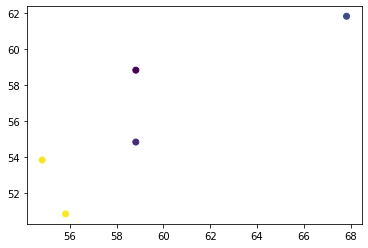

In [42]:
#вывод зависимости цены от местоположения
plt.scatter(df["lng"], df["lat"], c=df['per_square_meter_price'])

### osm_catering_points

In [ ]:
df.plot(kind = 'scatter', x = 'osm_catering_points_in_0.001', y = 'per_square_meter_price')
df.plot(kind = 'scatter', x = 'osm_catering_points_in_0.001', y = 'per_square_meter_price')
df.plot(kind = 'scatter', x = 'osm_catering_points_in_0.001', y = 'per_square_meter_price')
df.plot(kind = 'scatter', x = 'osm_catering_points_in_0.001', y = 'per_square_meter_price')

## Выделение нужных признаков

## One-hot-codding